Found 165 images.


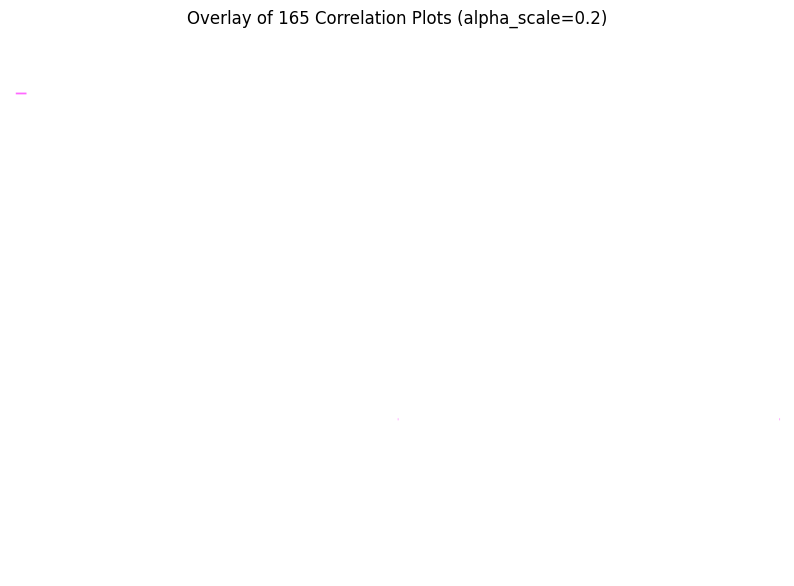

In [3]:
# ============================================================
# Overlay ALL Correlation Images in a Folder (High Transparency)
# ============================================================

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# ---- YOUR FOLDER PATH ----
# Put all the correlation PNGs you want to overlay in this folder.
folder_path = "/Users/adi/Desktop/Walk_correl2"

# ---- FILE FILTER (adjust if needed) ----
pattern = "*Original.png"          # e.g. "*_Original.png" or "*.png"
# pattern = "*.png"

# ---- TRANSPARENCY LEVEL (smaller = more transparent) ----
alpha_scale = 0.20  # VERY transparent

# ---- COLLECT FILES ----
image_paths = sorted(glob.glob(os.path.join(folder_path, pattern)))
if len(image_paths) == 0:
    raise FileNotFoundError(f"No files matched pattern '{pattern}' in: {folder_path}")

print(f"Found {len(image_paths)} images.")

# ---- LOAD FIRST IMAGE TO GET SHAPE ----
base_img = Image.open(image_paths[0]).convert("RGBA")
width, height = base_img.size

# ---- CREATE ACCUMULATION ARRAY ----
accumulator = np.zeros((height, width, 4), dtype=np.float32)

# ---- LOAD + ACCUMULATE ----
for path in image_paths:
    img = Image.open(path).convert("RGBA")

    # Safety: if any image size differs, resize to match the first image
    if img.size != (width, height):
        img = img.resize((width, height), resample=Image.BILINEAR)

    img_arr = np.array(img).astype(np.float32)
    img_arr[..., 3] *= alpha_scale  # scale alpha channel
    accumulator += img_arr

# ---- CLIP VALUES ----
accumulator = np.clip(accumulator, 0, 255).astype(np.uint8)

# ---- DISPLAY RESULT ----
plt.figure(figsize=(10, 10))
plt.imshow(accumulator)
plt.axis("off")
plt.title(f"Overlay of {len(image_paths)} Correlation Plots (alpha_scale={alpha_scale})")
plt.show()


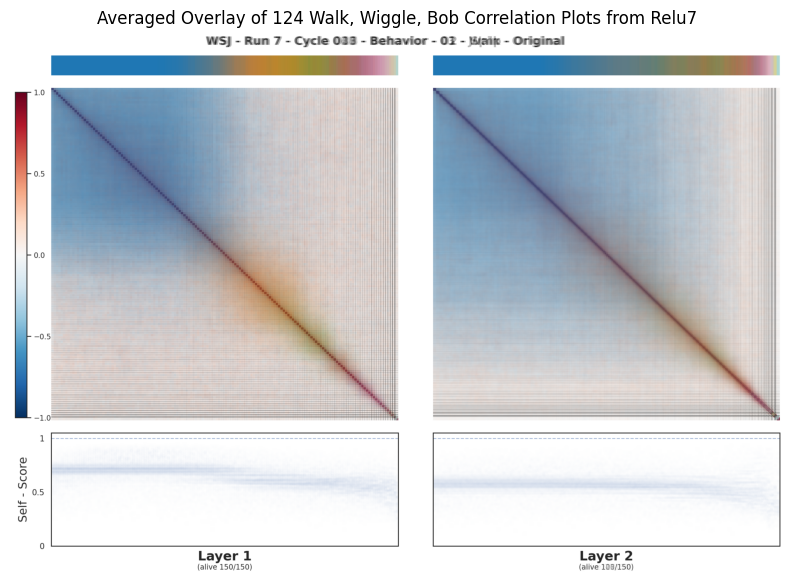

In [ ]:
# ============================================================
# Proper Structural Overlay via Pixel Averaging
# ============================================================

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ---- Load all images as RGB ----
images = []

for path in image_paths:
    img = Image.open(path).convert("RGB")
    images.append(np.array(img).astype(np.float32))

# ---- Stack ----
stack = np.stack(images, axis=0)

# ---- Average across images ----
avg_img = np.mean(stack, axis=0)

# ---- Normalize to valid range ----
avg_img = np.clip(avg_img, 0, 255).astype(np.uint8)

# ---- Display ----
plt.figure(figsize=(10, 10))
plt.imshow(avg_img)
plt.axis("off")
plt.title("Averaged Overlay of 82 Walk Only Correlation Plots")
plt.show()


In [4]:
# ============================================================
# Averaged Overlay — Contrast Enhanced (Colors Pop More)
# ============================================================

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ---- Load all images as RGB ----
images = []
for path in image_paths:
    img = Image.open(path).convert("RGB")
    images.append(np.array(img).astype(np.float32))

# ---- Stack ----
stack = np.stack(images, axis=0)

# ---- Average ----
avg_img = np.mean(stack, axis=0)

# ---- Contrast stretch (preserve colors, increase pop) ----
min_val = avg_img.min()
max_val = avg_img.max()

gamma = 0.8  # <1 increases contrast in darker regions

normalized = (avg_img - min_val) / (max_val - min_val)
gamma_corrected = np.power(normalized, gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)


# ---- Display ----
plt.figure(figsize=(10, 10))
plt.imshow(stretched)
plt.axis("off")
plt.title("Averaged Overlay (Contrast Enhanced)")
plt.show()


NameError: name 'stretched' is not defined

<Figure size 1000x1000 with 0 Axes>